dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

* 시험용 데이터로 측정한 정확도 = 0.94


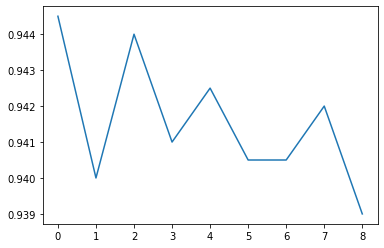

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
import matplotlib.pyplot as plt

#mnist 데이터를 다운로드하고 나중에 사용하기 위해 저장해 둔다.
# mnist = fetch_openml('mnist_784')
# with open('dataset/mnist.pickle', 'wb') as f:
#         pickle.dump(mnist, f)

# 저장된 mnist 데이터를 읽어온다.
with open('dataset/mnist.pickle', 'rb') as f:
        mnist = pickle.load(f)

print(mnist.keys())


# Train 데이터 세트와 Test 데이터 세트를 구성한다.
# 데이터가 많아 시간이 오래걸리므로, 앞 부분 10000개만 분석한다.
x = mnist['data'][:10000]
y = mnist['target'][:10000]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# KNN 으로 Train 데이터 세트를 학습한다.
# 데이터가 많으면 시간이 오래 걸린다 (lazy-learning)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(trainX, trainY)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다.
# 2000개의 시험 데이터마다 8000개의 학습 데이터와 거리를 계산하기 때문에
# 시간이 오래 걸린다.
accuracy = knn.score(testX, testY)
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)

acc=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    knn.fit(trainX, trainY)
    acc.append(knn.score(testX, testY))
plt.plot(acc)
plt.show()

